
# Análisis de Tráfico Urbano en Peajes de Colombia 🚗

Este cuaderno analiza los datos de tráfico urbano y tarifas de peajes en Colombia. Utilizamos el archivo `peajes_colombia.csv` para generar visualizaciones comparativas y realizar un análisis descriptivo.

## Funcionalidades
1. Carga y limpieza de los datos.
2. Conversión de fechas al formato adecuado.
3. Visualización de tendencias en tarifas y tráfico.
4. Comparativas de tráfico entre diferentes categorías y peajes.


In [3]:

# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para las gráficas
sns.set(style="whitegrid")



## Carga de Datos 📂
Cargamos el archivo `peajes_colombia.csv` y exploramos la estructura de los datos.


Estos son los datos históricos de los peajes en Colombia desde 2014 hasta 2022 (11, 98306). Es un excelente conjunto de datos para estudiar y obtener información rápida sobre el dinero recaudado, el tráfico y las ubicaciones. Ubicación de los datos en la siguiente ruta: https://www.kaggle.com/datasets/martinaltamar/historico-peajes-colombia-trafico-y-recaudo

In [2]:
# # Descargar y guardar el conjunto de datos usando kagglehub
# import kagglehub

# # Descargar la última versión del dataset
# path = kagglehub.dataset_download("martinaltamar/historico-peajes-colombia-trafico-y-recaudo")

# print("Ruta a los archivos del dataset:", path)


100%|██████████| 881k/881k [00:00<00:00, 3.23MB/s]

Extracting files...


Ruta a los archivos del dataset: C:\Users\frany\.cache\kagglehub\datasets\martinaltamar\historico-peajes-colombia-trafico-y-recaudo\versions\1


In [5]:

# Ruta del archivo CSV en la carpeta 'data'
file_path = './data/peajes_colombia.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')
data.head()


,IdPeaje,Peaje,IdCategoriaTarifa,FechaDesde,FechaHasta,ValorTarifa,Trafico,TraficoEvasores,TraficoExentos787,Lat,Lon
0,1,ALVARADO,I,8/21/2015,8/31/2015,7000,27730,0.0,660.0,-74.991661,4.507609
1,1,ALVARADO,II,8/21/2015,8/31/2015,7600,9930,0.0,70.0,-74.991661,4.507609
2,1,ALVARADO,III,8/21/2015,8/31/2015,16100,1277,0.0,0.0,-74.991661,4.507609
3,1,ALVARADO,IV,8/21/2015,8/31/2015,20400,2074,0.0,0.0,-74.991661,4.507609
4,1,ALVARADO,V,8/21/2015,8/31/2015,22900,4167,0.0,0.0,-74.991661,4.507609



### Inspección de Datos
Revisamos las columnas, tipos de datos y valores faltantes para asegurar que los datos están listos para el análisis.


In [6]:

# Información general del dataset
data.info()

# Revisar valores faltantes
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98306 entries, 0 to 98305
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IdPeaje            98306 non-null  int64  
 1   Peaje              98306 non-null  object 
 2   IdCategoriaTarifa  98306 non-null  object 
 3   FechaDesde         98306 non-null  object 
 4   FechaHasta         98306 non-null  object 
 5   ValorTarifa        98306 non-null  int64  
 6   Trafico            98306 non-null  int64  
 7   TraficoEvasores    96262 non-null  float64
 8   TraficoExentos787  96281 non-null  float64
 9   Lat                98306 non-null  float64
 10  Lon                98306 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 8.3+ MB


IdPeaje                 0
Peaje                   0
IdCategoriaTarifa       0
FechaDesde              0
FechaHasta              0
ValorTarifa             0
Trafico                 0
TraficoEvasores      2044
TraficoExentos787    2025
Lat                     0
Lon                     0
dtype: int64


## Procesamiento de Datos ⚙️
1. Convertimos las columnas de fechas (`FechaDesde`, `FechaHasta`) al formato `datetime`.
2. Rellenamos o eliminamos datos faltantes según sea necesario.


In [7]:

# Convertir columnas de fechas al formato datetime
data['FechaDesde'] = pd.to_datetime(data['FechaDesde'], errors='coerce')
data['FechaHasta'] = pd.to_datetime(data['FechaHasta'], errors='coerce')

# Rellenar valores faltantes en 'ValorTarifa' con el promedio
data['ValorTarifa'].fillna(data['ValorTarifa'].mean(), inplace=True)

# Verificar nuevamente los datos
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98306 entries, 0 to 98305
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   IdPeaje            98306 non-null  int64         
 1   Peaje              98306 non-null  object        
 2   IdCategoriaTarifa  98306 non-null  object        
 3   FechaDesde         98306 non-null  datetime64[ns]
 4   FechaHasta         98306 non-null  datetime64[ns]
 5   ValorTarifa        98306 non-null  int64         
 6   Trafico            98306 non-null  int64         
 7   TraficoEvasores    96262 non-null  float64       
 8   TraficoExentos787  96281 non-null  float64       
 9   Lat                98306 non-null  float64       
 10  Lon                98306 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 8.3+ MB


C:\Users\frany\AppData\Local\Temp\ipykernel_21644\3375811983.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ValorTarifa'].fillna(data['ValorTarifa'].mean(), inplace=True)



## Análisis Descriptivo 🧮
Exploramos las tarifas promedio y el tráfico por categorías y peajes.


In [8]:

# Calcular el tráfico promedio por peaje
trafico_promedio_peaje = data.groupby('Peaje')['Trafico'].mean().sort_values(ascending=False)

# Mostrar los peajes con mayor tráfico
trafico_promedio_peaje.head(10)


Peaje
ANDES         102951.319502
CHUSACA        79637.782297
GUARNE         64870.666667
RÍO BOGOTÁ     60930.145148
TURBACO        60848.302041
CHINAUTA       59634.161290
LA PARADA      49568.206704
EL ROBLE       46043.978204
CERRITO        45827.485714
GUALANDAY      42250.018538
Name: Trafico, dtype: float64


### Visualización: Peajes con Mayor Tráfico


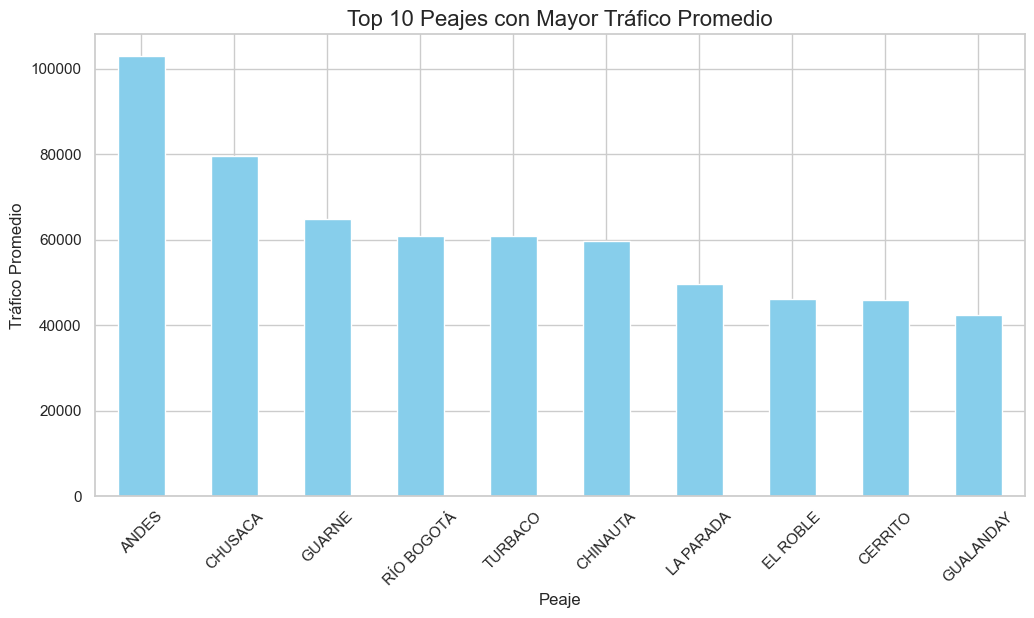

In [9]:

# Gráfico de barras para los peajes con mayor tráfico
plt.figure(figsize=(12, 6))
trafico_promedio_peaje.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Peajes con Mayor Tráfico Promedio', fontsize=16)
plt.ylabel('Tráfico Promedio', fontsize=12)
plt.xlabel('Peaje', fontsize=12)
plt.xticks(rotation=45)
plt.show()



### Comparativa: Tarifas por Categoría
Visualizamos cómo varían las tarifas promedio según la categoría.


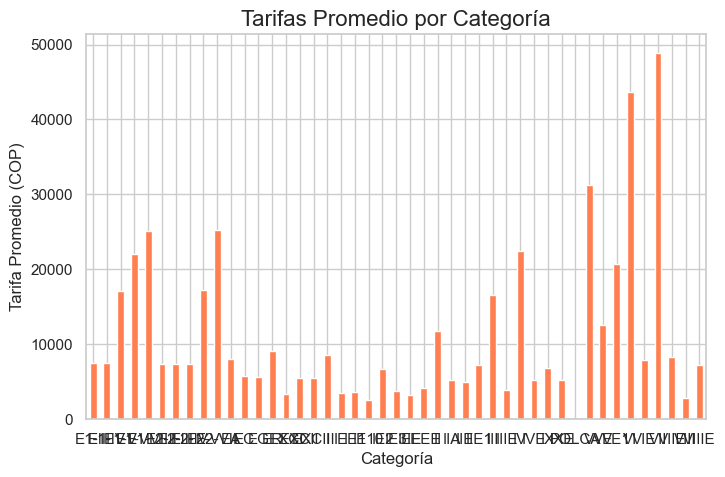

In [10]:

# Calcular tarifas promedio por categoría
tarifas_por_categoria = data.groupby('IdCategoriaTarifa')['ValorTarifa'].mean()

# Gráfico de barras para tarifas por categoría
plt.figure(figsize=(8, 5))
tarifas_por_categoria.plot(kind='bar', color='coral')
plt.title('Tarifas Promedio por Categoría', fontsize=16)
plt.ylabel('Tarifa Promedio (COP)', fontsize=12)
plt.xlabel('Categoría', fontsize=12)
plt.xticks(rotation=0)
plt.show()



### Tendencias de Tráfico a lo Largo del Tiempo
Visualizamos cómo el tráfico ha cambiado con el tiempo.


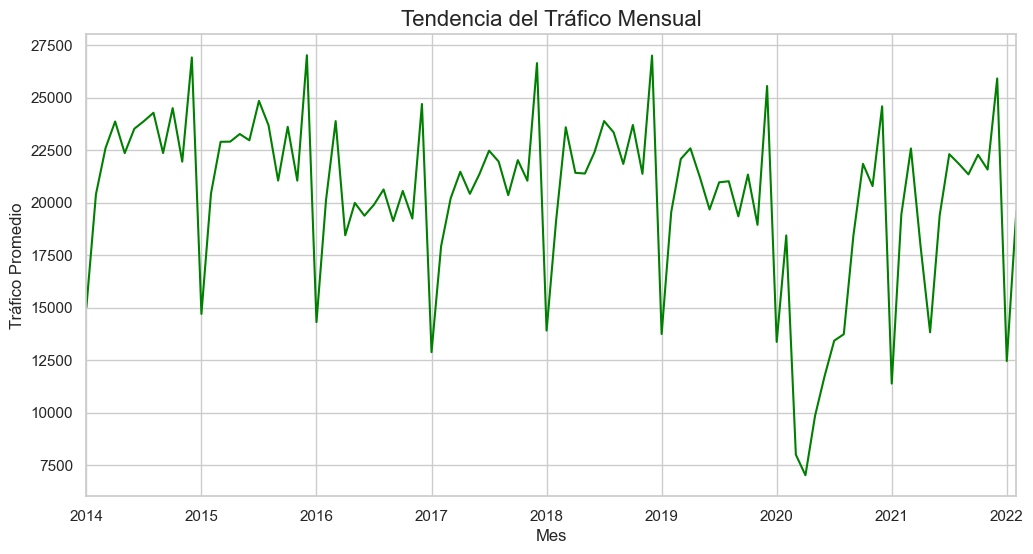

In [11]:

# Tráfico promedio mensual
data['Mes'] = data['FechaDesde'].dt.to_period('M')
trafico_mensual = data.groupby('Mes')['Trafico'].mean()

# Gráfico de línea para tendencias de tráfico
plt.figure(figsize=(12, 6))
trafico_mensual.plot(kind='line', color='green')
plt.title('Tendencia del Tráfico Mensual', fontsize=16)
plt.ylabel('Tráfico Promedio', fontsize=12)
plt.xlabel('Mes', fontsize=12)
plt.grid(True)
plt.show()



## Conclusión 📝
Este análisis proporciona una visión general del tráfico y las tarifas en los peajes de Colombia, permitiendo identificar patrones y comparativas clave.

---
¡Gracias por explorar este análisis!
